In [23]:
import pandas as pd

pd.read_csv("ilt20_final_player_statistics_2025.csv")
player_stats = pd.read_csv("ilt20_final_player_statistics_2025.csv")
player_stats.sample(5)

,Player,Inns_batting,NO,Runs_batting,HS,Ave_batting,BF,SR_batting,100,50,...,Wkts,BBI,Ave_bowling,Econ,SR_bowling,4,5,Team,Nationality,Matches
17,Ali Naseer,2.0,0.0,7.0,5,3.5,13.0,53.84,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DV,U.A.E.,7.0
95,SW Billings,2.0,0.0,44.0,38,22.0,26.0,169.23,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,England,4.0
66,MS Pepper,6.0,0.0,90.0,57,15.0,70.0,128.57,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADKR,England,6.0
77,OP Stone,3.0,2.0,1.0,1*,1.0,7.0,14.28,0.0,0.0,...,5.0,2/14,25.0,8.33,18.0,0.0,0.0,DC,England,4.0
12,AM Rossington,5.0,0.0,138.0,44,27.6,101.0,136.63,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,England,5.0


# Introduction to ILT20 section

In [24]:
import matplotlib.pyplot as plt

#summary statistics
number_of_players = player_stats["Player"].nunique()
number_of_nationalities = player_stats["Nationality"].nunique()


print("Number of Players in ILT20 2025: ", number_of_players)
print("Number of Nationalities in ILT20 2025: ", number_of_nationalities)
print("List of Countries Represented", player_stats["Nationality"].unique())



Number of Players in ILT20 2025:  118
Number of Nationalities in ILT20 2025:  13
List of Countries Represented ['England' 'U.A.E.' 'Australia' 'West Indies' 'New Zealand' 'U.S.A.'
 'Afghanistan' 'Pakistan' 'Scotland' 'Zimbabwe' 'Sri Lanka' 'Namibia'
 'Ireland']


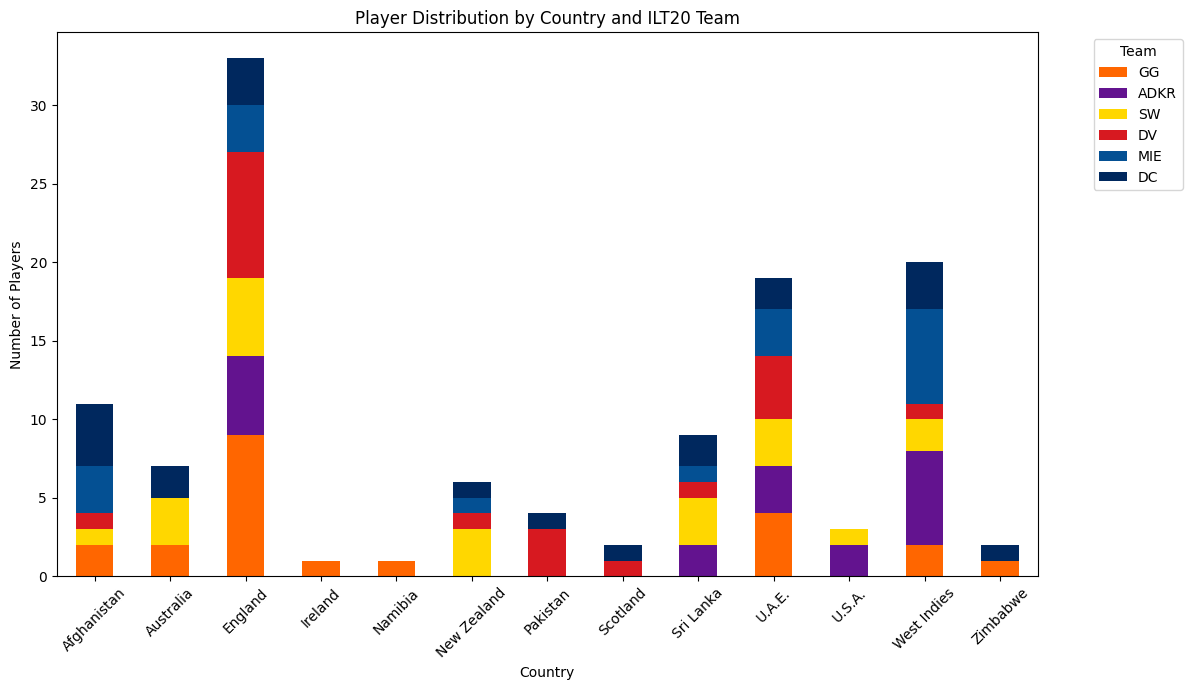

Team with the most countries represented:  DC with 10 countries
Team with the least countries represented:  ADKR with 5 countries


In [25]:
#number of players per country
number_of_players_per_country = player_stats["Nationality"].value_counts()

#creates a pivot table to find where each player is from and who they play for 
country_team_players = player_stats.pivot_table(index= "Nationality", columns="Team", aggfunc="size", fill_value=0)

#assign colours based on each team
teams = player_stats["Team"].unique()
team_colours = {
    "ADKR": "#63138f",
    "DC": "#00285e",
    "GG": "#ff6600",
    "MIE": "#045093",
    "DV": "#d71920",
    "SW": "#FFD700"
}

#order the players by team and colours
ordered_teams = [team for team in teams if team in country_team_players.columns]
country_team_players = country_team_players[ordered_teams]
colours = [team_colours[team] for team in ordered_teams]

#plot the data
country_team_players.plot( kind='bar', stacked=True, figsize=(12, 7), color=colours)
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("Player Distribution by Country and ILT20 Team")
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#team with the most countries 
team_with_most_countries = country_team_players.astype(bool).sum(axis=0).idxmax()
print("Team with the most countries represented: ", team_with_most_countries, "with", country_team_players.astype(bool).sum(axis=0).max(), "countries")
team_with_least_countries = country_team_players.astype(bool).sum(axis=0).idxmin()
print("Team with the least countries represented: ", team_with_least_countries, "with", country_team_players.astype(bool).sum(axis=0).min(), "countries")


# Highest runs scored

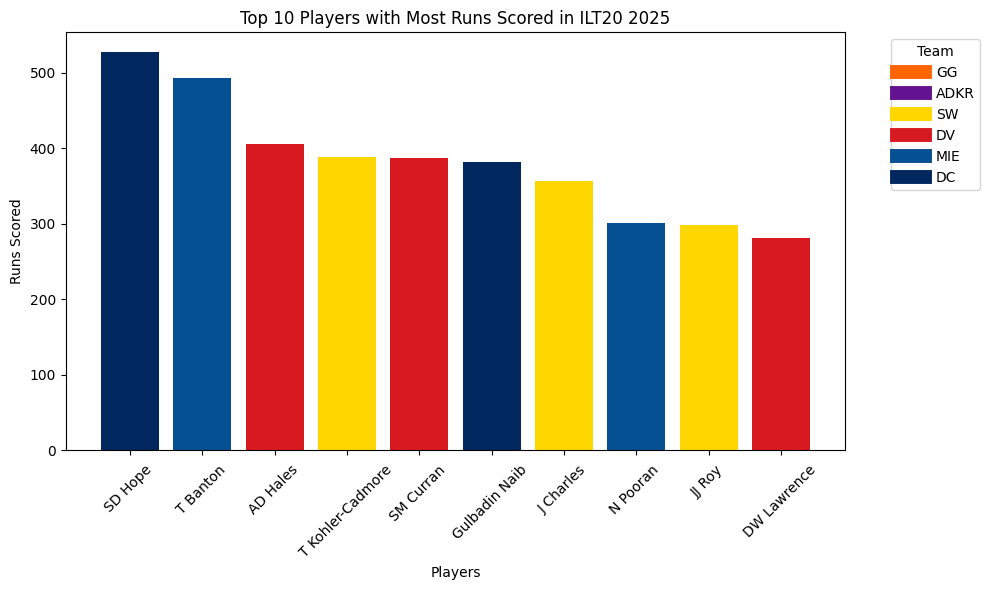

In [26]:

#removes players who did not bat
batting_runs_scored = player_stats.dropna(subset=["Inns_batting"])

#sorts players by runs scored and selects top 10
top_10_runs_scored = batting_runs_scored.sort_values(by= "Runs_batting", ascending=False).head(10)

bar_colours = top_10_runs_scored['Team'].map(team_colours)

#creates the plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_runs_scored["Player"], top_10_runs_scored["Runs_batting"], color= bar_colours)
plt.xlabel("Players")
plt.ylabel("Runs Scored")
plt.title("Top 10 Players with Most Runs Scored in ILT20 2025")
plt.xticks(rotation=45)

#adds a key for team colours
handles = [plt.Line2D([0], [0], color=team_colours[team], lw=10) for team in teams]
plt.legend(handles, teams, title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


# Distribution of average runs

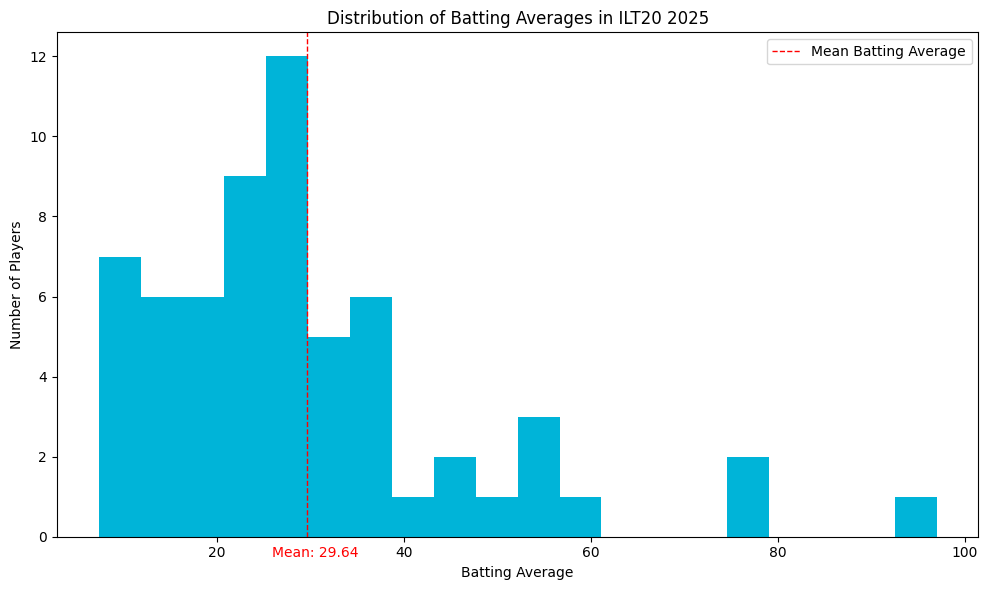

                Player  Ave_batting Team  Nationality  Inns_batting
27          DA Warner         97.00   DC    Australia           2.0
105         TK Curran         78.50   GG      England           5.0
61         MDE Holden         76.66   DV      England           4.0
90            SD Hope         58.55   DC  West Indies          12.0
101  T Kohler-Cadmore         55.42   SW      England          10.0
92          SM Curran         55.28   DV      England          12.0
99           T Banton         54.77  MIE      England          11.0
3             AC Agar         51.00   SW    Australia           4.0
48         KA Pollard         45.50  MIE  West Indies           6.0
107          TP Alsop         45.33   GG      England           4.0


In [27]:
#filters out the players who are not "batsmen" by making minimum of 5 overs faced
full_batsmen = player_stats[player_stats["BF"] >= 30]
full_batsmen = full_batsmen.dropna(subset=["Ave_batting"])

#finds the mean batting average
mean_batting_average = full_batsmen["Ave_batting"].mean()

#plots a histogram of all batsmen
plt.figure(figsize=(10, 6))
plt.hist(full_batsmen["Ave_batting"], bins=20, color="#00b4d8")
plt.xlabel("Batting Average")
plt.ylabel("Number of Players")
plt.title("Distribution of Batting Averages in ILT20 2025")
plt.axvline(mean_batting_average, color='red', linestyle='dashed', linewidth=1, label='Mean Batting Average')
plt.text(mean_batting_average -3.75, -0.5, f'Mean: {mean_batting_average:.2f}', color='red')
plt.legend()
plt.tight_layout()
plt.show()

#sorts them in descending order
full_batsmen_average_runs_sorted = full_batsmen.sort_values(by="Ave_batting", ascending=False)

#list of top 10 players with highest batting average
top_10_batting_average = full_batsmen_average_runs_sorted.head(10)
print(top_10_batting_average[["Player", "Ave_batting", "Team", "Nationality", "Inns_batting"]])



# Batting Strike Rate

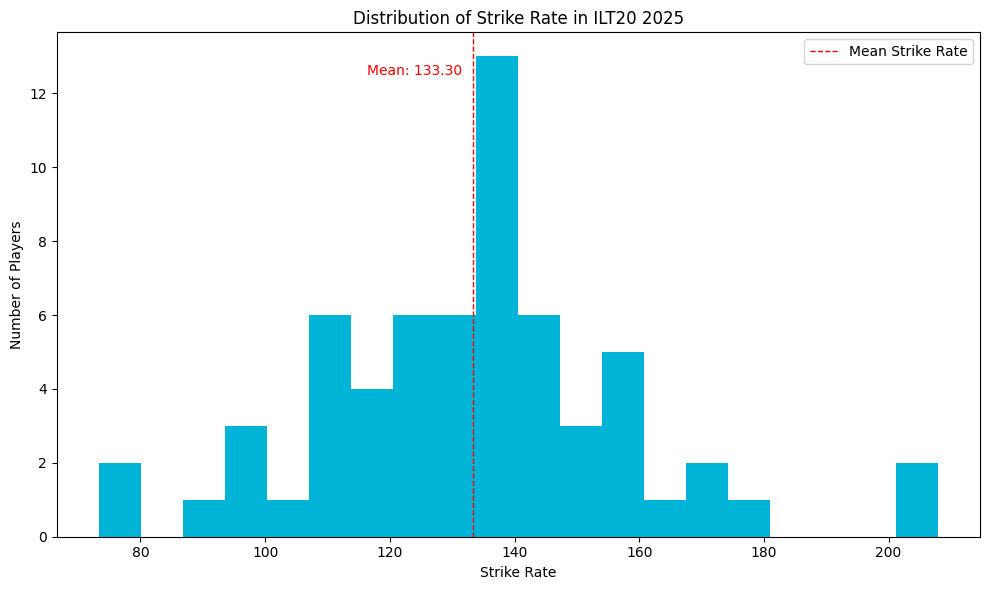

             Player  SR_batting  Runs_batting  Team  Nationality
112   WIA Fernando       207.93         131.0    SW    Sri Lanka
60      MD Shanaka       202.46         164.0    DC    Sri Lanka
47       JO Holder       180.00         126.0  ADKR  West Indies
84      R Shepherd       171.87         110.0   MIE  West Indies
91   SE Rutherford       171.64         115.0    DV  West Indies
42       J Charles       166.82         357.0    SW  West Indies
72        N Pooran       160.10         301.0   MIE  West Indies
37   Gulbadin Naib       158.75         381.0    DC  Afghanistan
5       AD Russell       156.62         130.0  ADKR  West Indies
27       DA Warner       156.45          97.0    DC    Australia
                Player  SR_batting  Runs_batting  Team  Nationality
106        TL Seifert       109.78         101.0    SW  New Zealand
107          TP Alsop       108.80         136.0    GG      England
10          AJ Hosein       107.14          75.0   MIE  West Indies
103        TG

In [28]:
#finds the mean batting strike rate
mean_batting_strike_rate = full_batsmen["SR_batting"].mean()

#plots a histogram of all batsmen
plt.figure(figsize=(10, 6))
plt.hist(full_batsmen["SR_batting"], bins=20, color="#00b4d8")
plt.xlabel("Strike Rate")
plt.ylabel("Number of Players")
plt.title("Distribution of Strike Rate in ILT20 2025")
plt.axvline(mean_batting_strike_rate, color='red', linestyle='dashed', linewidth=1, label='Mean Strike Rate')
plt.text(mean_batting_strike_rate -17, 12.5, f'Mean: {mean_batting_strike_rate:.2f}', color='red')
plt.legend()
plt.tight_layout()
plt.show()

#sorts them in descending order
full_batsmen_average_strike_rate_sorted = full_batsmen.sort_values(by="SR_batting", ascending=False)

#list of top 10 players with highest strike rate
top_10_batting_strike_rate = full_batsmen_average_strike_rate_sorted.head(10)
print(top_10_batting_strike_rate[["Player", "SR_batting", "Runs_batting", "Team", "Nationality"]])

#lowest strike rate
bottom_10_batting_strike_rate = full_batsmen_average_strike_rate_sorted.tail(10)
print(bottom_10_batting_strike_rate[["Player", "SR_batting", "Runs_batting", "Team", "Nationality"]])


# Strike rate per team

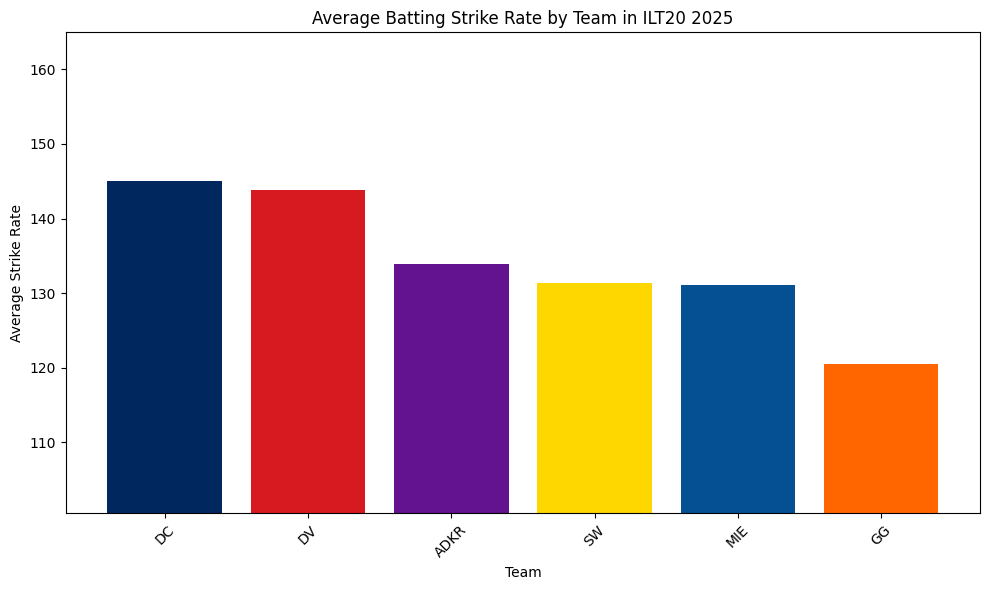

Team
DC      144.968889
DV      143.875714
ADKR    133.943077
SW      131.315385
MIE     131.051111
GG      120.465455
Name: SR_batting, dtype: float64


In [29]:
#groups the players by team and finds the mean batting average
average_strike_rate_by_team = full_batsmen.groupby("Team")["SR_batting"].mean().sort_values(ascending=False)

#plots
plt.figure(figsize=(10, 6))
plt.bar(average_strike_rate_by_team.index, average_strike_rate_by_team.values, color=[team_colours[team] for team in average_strike_rate_by_team.index])
plt.xlabel("Team")
plt.ylabel("Average Strike Rate")
plt.title("Average Batting Strike Rate by Team in ILT20 2025")
plt.xticks(rotation=45)
plt.ylim(min(average_strike_rate_by_team) - 20, max(average_strike_rate_by_team.values) + 20)

plt.tight_layout()
plt.show()

#strike rate by team
print(average_strike_rate_by_team)

# Top Wicket Takers

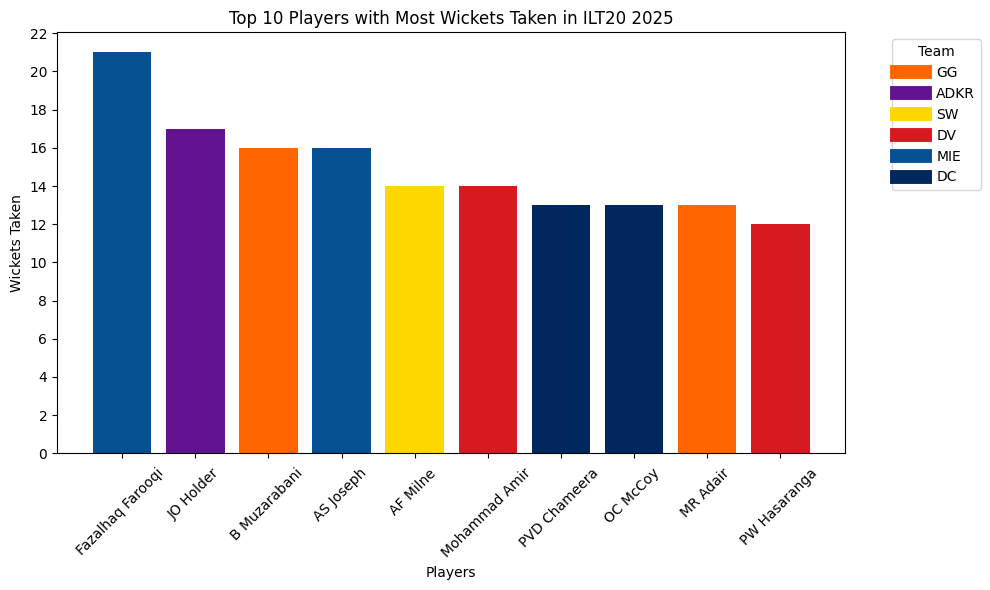

In [33]:

#removes players who did not bowl
bowlers = player_stats.dropna(subset=["Inns_bowling"])

#sorts players by number of wickets and selects top 10
top_10_wickets = bowlers.sort_values(by= "Wkts", ascending=False).head(10)

bar_colours = top_10_wickets['Team'].map(team_colours)

#creates the plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_wickets["Player"], top_10_wickets["Wkts"], color= bar_colours)
plt.xlabel("Players")
plt.ylabel("Wickets Taken")
plt.title("Top 10 Players with Most Wickets Taken in ILT20 2025")
plt.xticks(rotation=45)
plt.yticks(range(0, int(top_10_wickets["Wkts"].max()) + 2, 2))


#adds a key for team colours
handles = [plt.Line2D([0], [0], color=team_colours[team], lw=10) for team in teams]
plt.legend(handles, teams, title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


# Number of Wickets Taken per Team

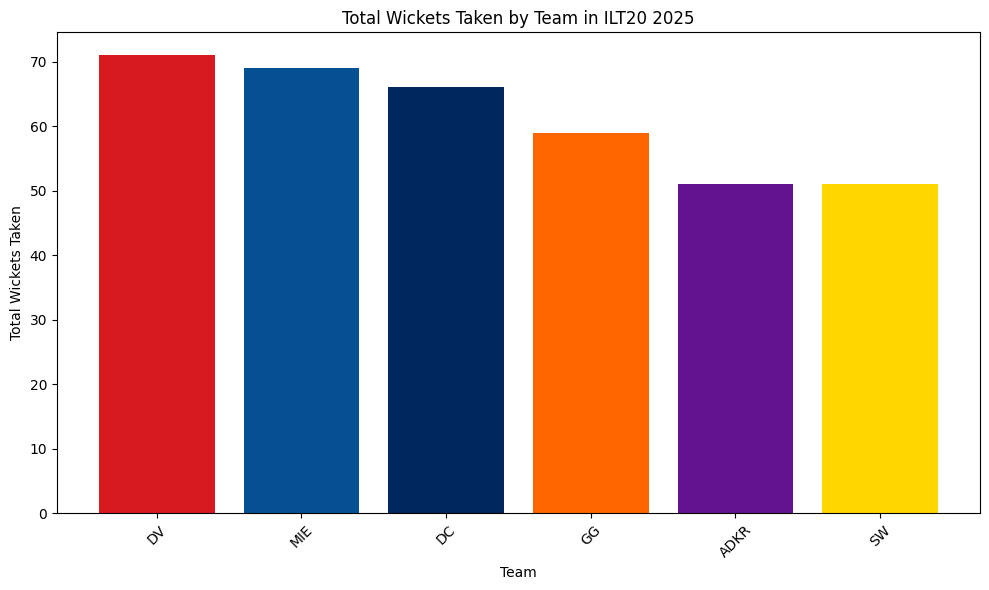

Total Number of Matches Played:  Team
DV      13.0
DC      12.0
SW      12.0
MIE     11.0
ADKR    10.0
GG      10.0
Name: Matches, dtype: float64
Total Number of Wickets Taken:  Team
DV      71.0
MIE     69.0
DC      66.0
GG      59.0
ADKR    51.0
SW      51.0
Name: Wkts, dtype: float64
Average Wickets Taken per Team:  Team
MIE     6.272727
GG      5.900000
DC      5.500000
DV      5.461538
ADKR    5.100000
SW      4.250000
dtype: float64


In [43]:
#groups the players by team and finds the total wickets taken
total_wickets_per_team = bowlers.groupby("Team")["Wkts"].sum().sort_values(ascending=False)

#plots
plt.figure(figsize=(10, 6))
plt.bar(total_wickets_per_team.index, total_wickets_per_team.values, color=[team_colours[team] for team in total_wickets_per_team.index])
plt.xlabel("Team")
plt.ylabel("Total Wickets Taken")
plt.title("Total Wickets Taken by Team in ILT20 2025")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


#total number of games played by each team
total_games_per_team = player_stats.groupby("Team")["Matches"].max().sort_values(ascending=False)
print("Total Number of Matches Played: ", total_games_per_team)

#total wickets by team
print("Total Number of Wickets Taken: ", total_wickets_per_team)

#average number of wickets taken by team
average_wickets_per_team = total_wickets_per_team / total_games_per_team
print("Average Wickets Taken per Team: ", average_wickets_per_team.sort_values(ascending=False))
